In [231]:
#step 1 import pandas
import pandas as pd
import matplotlib
import os

In [232]:
#step 2 load open prescribing measures data to filter out a subset for testing all scripts
data = pd.read_csv('measures.csv', sep=',') #data is sepperated by , (commas)

In [233]:
#step 3 check data has imported correctly 
data.head(3) # Show top 3 entries

,measure,org_type,org_id,org_name,date,numerator,denominator,calc_value,percentile
0,ktt9_antibiotics,practice,P84650,THE ALEXANDRA PRACTICE,2014-10-01,199.0,3106.653507,0.064056,9.181078
1,ktt9_antibiotics,practice,P84673,ANCOATS URBAN VILLAGE MEDICAL PRACTICE,2014-10-01,463.0,4252.799604,0.108869,75.864700
2,ktt9_antibiotics,practice,P84071,WILBRAHAM SURGERY,2014-10-01,219.0,2275.856965,0.096227,57.540692


In [234]:
#step 4 Convert to a dataframe
dataframe = pd.DataFrame(data)
#view data frame
dataframe.head(3)

,measure,org_type,org_id,org_name,date,numerator,denominator,calc_value,percentile
0,ktt9_antibiotics,practice,P84650,THE ALEXANDRA PRACTICE,2014-10-01,199.0,3106.653507,0.064056,9.181078
1,ktt9_antibiotics,practice,P84673,ANCOATS URBAN VILLAGE MEDICAL PRACTICE,2014-10-01,463.0,4252.799604,0.108869,75.864700
2,ktt9_antibiotics,practice,P84071,WILBRAHAM SURGERY,2014-10-01,219.0,2275.856965,0.096227,57.540692


In [235]:
#step 5 sort dataframe first by number of prescriptions
dataframe_Sort = dataframe.sort_values("numerator")
#See the following URL to sort by more than one column: 
#https://www.geeksforgeeks.org/python-pandas-dataframe-sort_values-set-2/
dataframe_Sort.head(6)

,measure,org_type,org_id,org_name,date,numerator,denominator,calc_value,percentile
2050,ktt9_antibiotics,practice,P84659,DR HUSSAIN'S PRACTICE,2016-07-01,0.0,0.0,NaN,NaN
1003,ktt9_antibiotics,practice,P84063,DR CHEN & DAVIS,2015-08-01,0.0,0.0,NaN,NaN
1011,ktt9_antibiotics,practice,P84057,KAYA PRACTICE,2015-08-01,0.0,0.0,NaN,NaN
3978,ktt9_antibiotics,practice,P84623,ALEESHAN MEDICAL CENTRE,2018-03-01,0.0,0.0,NaN,NaN
1014,ktt9_antibiotics,practice,P84677,DIDSBURY MEDICAL CENTRE- DR ASHWORTH,2015-08-01,0.0,0.0,NaN,NaN
3974,ktt9_antibiotics,practice,P84063,DR CHEN & DAVIS,2018-03-01,0.0,0.0,NaN,NaN


In [236]:
# step 6 Check if any database entries (rows) have 0.0 prescriptions as these will need to be removed
NoAnti =  dataframe_Sort['numerator']==0.0
NoAnti.head(3)
#count number of rows with 0 prescriptions
PCo = len(dataframe_Sort[dataframe_Sort['numerator'] == 0.0]) 
PCo


345

In [237]:
#step 7 print warning meassage to user... using if statement e.g. 
if PCo>0:
    print('This dataset contains', PCo, 'entries with 0 prescriptions. These entries will be removed from the dataset.')
else:
    print('no errors were detected')

This dataset contains 345 entries with 0 prescriptions. These entries will be removed from the dataset.


In [238]:
# step 8 Identify all database entries with >0.0 prescriptions and remove
AntiP =  dataframe_Sort['numerator']>0.0
AntiP.head(3)
AntiP.tail(3)

4438    True
4346    True
4608    True
Name: numerator, dtype: bool

In [239]:
# step 9 Filter out all rows with 0 prescriptions
df_SF = dataframe_Sort[AntiP]
df_SF.head(3)

,measure,org_type,org_id,org_name,date,numerator,denominator,calc_value,percentile
2770,ktt9_antibiotics,practice,P84676,OSWALD ROAD MEDICAL PRACTICE,2017-02-01,1.0,0.00000,NaN,NaN
415,ktt9_antibiotics,practice,P84605,FERNCLOUGH SURGERY,2015-02-01,1.0,1089.97012,0.000917,0.242378
2633,ktt9_antibiotics,practice,P84676,OSWALD ROAD MEDICAL PRACTICE,2017-01-01,1.0,0.00000,NaN,NaN


In [240]:
#Check all rows with 0 prescriptions have been removed
min(df_SF.numerator) # check minimum value is not 0.0

1.0

In [241]:
#Calculate IQR
#Q1
q1 = df_SF['numerator'].quantile(0.25)
#Q3
q3 = df_SF['numerator'].quantile(0.75) 
#IQR
iqr=q3-q1
print(iqr)

219.0


In [242]:
#Calclate lower limit for outliers
LowOut = q1 - 1.5 * iqr

In [243]:
#Calculate upper limit for outliers
HighOut = q3 + 1.5 * iqr
HighOut

724.5

In [244]:
# TEST:filtering Values between Q1-1.5IQR and Q3+1.5IQR
# See https://stackoverflow.com/questions/34782063/how-to-use-pandas-filter-with-iqr
#Are Outliers present?
LowOutliers = df_SF['numerator']<=LowOut
HighOutliers = df_SF['numerator']>=HighOut
HighOutliers.tail(6)
HighOutliers.head(6)

2770    False
415     False
2633    False
3300    False
651     False
2840    False
Name: numerator, dtype: bool

In [251]:
# Filter out all rows with high and low outliers 
Outliers = df_SF[(df_SF['numerator'] < LowOut) | (df_SF['numerator'] > HighOut)] #|= OR
Outliers.head(3)

,measure,org_type,org_id,org_name,date,numerator,denominator,calc_value,percentile
4913,ktt9_antibiotics,practice,P84024,BOWLAND MEDICAL PRACTICE,2019-01-01,725.0,4197.163098,0.172736,99.227025
2168,ktt9_antibiotics,practice,P84029,BENCHILL MEDICAL PRACTICE,2016-08-01,725.0,5145.058829,0.140912,98.956269
550,ktt9_antibiotics,practice,P84024,BOWLAND MEDICAL PRACTICE,2015-03-01,726.0,4109.562702,0.176661,98.239571


In [262]:
#count number of outliers and print message to inform the user
NoOutliers = len(Outliers['numerator'])
print('This dataset contains', NoOutliers, 'Outliers, represented by the circles in the boxplot below.')

This dataset contains 154 Outliers, represented by circles in the boxplot below.


{'whiskers': [<matplotlib.lines.Line2D at 0x7f5f01186ac8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5f01190198>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5f01186978>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5f01190828>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5f01190b70>],
 'means': []}

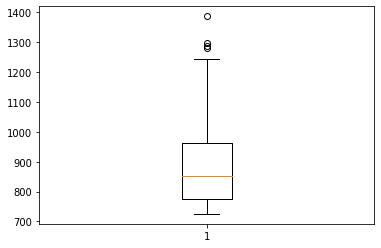

In [263]:
#plot boxplot for outliers...
import matplotlib
import matplotlib.pyplot as plt
plt.boxplot(Outliers.numerator)

In [264]:
# TODO: clean up code - remove test lines
#Improve annotations/comments
#Improve boxplot
#Combine code branches